In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
from scipy.signal import savgol_filter

In [3]:
import matplotlib.pyplot as plt

## Data

In [4]:
macro = pd.read_csv('data/macro.csv', index_col=0)
macro.index = pd.to_datetime(macro.index).dropna()
macro_rets = macro.pct_change().dropna()

In [5]:
temp_ls = []
for col in macro_rets.columns:
    srs = macro_rets[col]
    srs_hat = savgol_filter(srs, (int(len(srs)/16))*2+1, int(((int(len(srs)/16)*2)+1)/5), mode='nearest')
    srs_hat = pd.Series(srs_hat, index=srs.index, name=srs.name)
    temp_ls.append(srs_hat)
    
result = pd.DataFrame(temp_ls).T

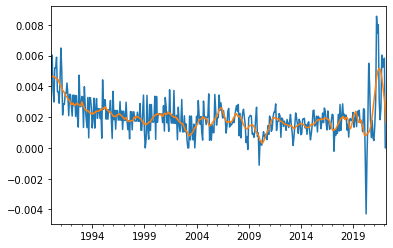

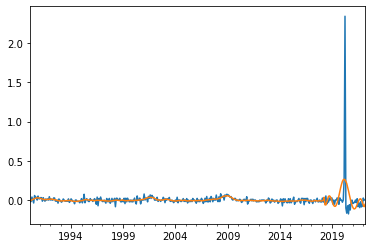

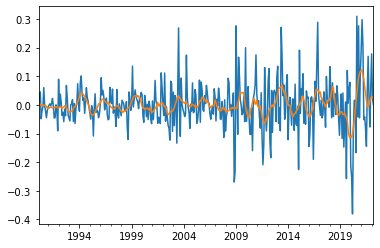

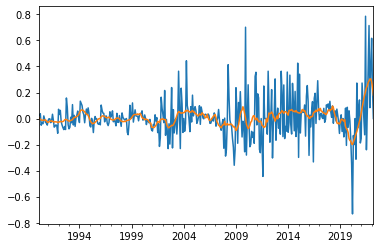

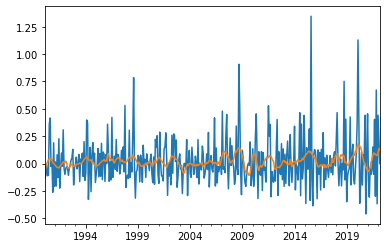

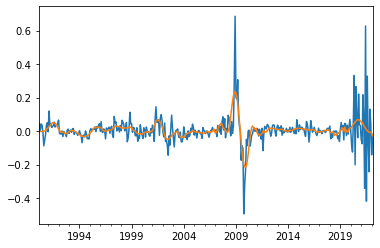

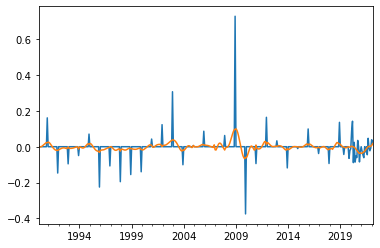

In [6]:
for col in macro_rets.columns:
    macro_rets[col].plot()
    result[col].plot()
    plt.show()

In [7]:
result.to_csv('data/macro_encoded_sav.csv')